# Discretisers

Examples on how to use variable discretisation transformers available in Feature-engine.

For this demonstration, we use the Ames House Prices dataset produced by Professor Dean De Cock:

Dean De Cock (2011) Ames, Iowa: Alternative to the Boston Housing
Data as an End of Semester Regression Project, Journal of Statistics Education, Vol.19, No. 3

http://jse.amstat.org/v19n3/decock.pdf

https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627

The version of the dataset used in this notebook can be obtained from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from feature_engine import discretisers as dsc

In [2]:
data = pd.read_csv('houseprice.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Id', 'SalePrice'], axis=1),
    data['SalePrice'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((1022, 79), (438, 79))

## EqualFrequencyDiscretiser

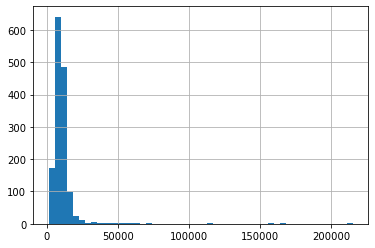

In [4]:
data['LotArea'].hist(bins=50)

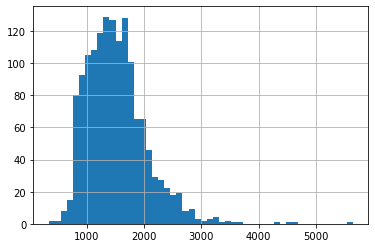

In [5]:
data['GrLivArea'].hist(bins=50)

In [6]:
efd = dsc.EqualFrequencyDiscretiser(q=10, variables=['LotArea', 'GrLivArea'])

efd.fit(X_train)

EqualFrequencyDiscretiser(q=10, return_boundaries=False, return_object=False,
                          variables=['LotArea', 'GrLivArea'])

In [7]:
# binner_dict contains the boundaries of the different bins
efd.binner_dict_

{'LotArea': [-inf,
  5007.1,
  7164.6,
  8165.700000000001,
  8882.0,
  9536.0,
  10200.0,
  11046.300000000001,
  12166.400000000001,
  14373.9,
  inf],
 'GrLivArea': [-inf,
  912.0,
  1069.6000000000001,
  1211.3000000000002,
  1344.0,
  1479.0,
  1603.2000000000003,
  1716.0,
  1893.0000000000005,
  2166.3999999999996,
  inf]}

In [8]:
train_t = efd.transform(X_train)
test_t = efd.transform(X_test)

In [9]:
# the numbers are the different bins into which the observations
# were sorted
train_t['GrLivArea'].unique()

array([8, 3, 0, 4, 1, 2, 6, 9, 7, 5], dtype=int64)

In [10]:
# the numbers are the different bins into which the observations
# were sorted
train_t['LotArea'].unique()

array([4, 0, 2, 3, 1, 7, 5, 8, 6, 9], dtype=int64)

In [11]:
# here I put side by side the original variable and the transformed variable
tmp = pd.concat([X_train['GrLivArea'], train_t['GrLivArea']], axis=1)
tmp.columns = ['GrLivArea', 'GrLivArea_binned']
tmp.head()

,GrLivArea,GrLivArea_binned
64,2034,8
682,1291,3
960,858,0
1384,1258,3
1100,438,0


Text(0, 0.5, 'Number of houses')

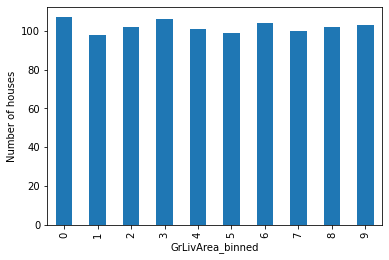

In [12]:
# in  equal frequency discretisation, we obtain the same amount of observations
# in each one of the bins.

tmp.groupby('GrLivArea_binned')['GrLivArea'].count().plot.bar()
plt.ylabel('Number of houses')

### Return interval limits instead

In [13]:
# Now, let's return bin boundaries instead

efd = dsc.EqualFrequencyDiscretiser(q=10, variables=['LotArea', 'GrLivArea'], return_boundaries=True)

efd.fit(X_train)

EqualFrequencyDiscretiser(q=10, return_boundaries=True, return_object=False,
                          variables=['LotArea', 'GrLivArea'])

In [14]:
train_t = efd.transform(X_train)
test_t = efd.transform(X_test)

In [15]:
# the numbers are the different bins into which the observations
# were sorted
train_t['GrLivArea'].unique()

[(1893.0, 2166.4], (1211.3, 1344.0], (-inf, 912.0], (1344.0, 1479.0], (912.0, 1069.6], (1069.6, 1211.3], (1603.2, 1716.0], (2166.4, inf], (1716.0, 1893.0], (1479.0, 1603.2]]
Categories (10, interval[float64]): [(-inf, 912.0] < (912.0, 1069.6] < (1069.6, 1211.3] < (1211.3, 1344.0] ... (1603.2, 1716.0] < (1716.0, 1893.0] < (1893.0, 2166.4] < (2166.4, inf]]

In [16]:
test_t['GrLivArea'].unique()

[(2166.4, inf], (1479.0, 1603.2], (1069.6, 1211.3], (1893.0, 2166.4], (912.0, 1069.6], (1344.0, 1479.0], (1603.2, 1716.0], (-inf, 912.0], (1211.3, 1344.0], (1716.0, 1893.0]]
Categories (10, interval[float64]): [(-inf, 912.0] < (912.0, 1069.6] < (1069.6, 1211.3] < (1211.3, 1344.0] ... (1603.2, 1716.0] < (1716.0, 1893.0] < (1893.0, 2166.4] < (2166.4, inf]]

## EqualWidthDiscretiser

In [17]:
ewd = dsc.EqualWidthDiscretiser(bins=10, variables=['LotArea', 'GrLivArea'])

ewd.fit(X_train)

EqualWidthDiscretiser(bins=10, return_boundaries=False, return_object=False,
                      variables=['LotArea', 'GrLivArea'])

In [18]:
# binner_dict contains the boundaries of the bins

ewd.binner_dict_

{'LotArea': [-inf,
  22694.5,
  44089.0,
  65483.5,
  86878.0,
  108272.5,
  129667.0,
  151061.5,
  172456.0,
  193850.5,
  inf],
 'GrLivArea': [-inf,
  768.2,
  1202.4,
  1636.6,
  2070.8,
  2505.0,
  2939.2,
  3373.4,
  3807.6,
  4241.799999999999,
  inf]}

In [19]:
train_t = ewd.transform(X_train)
test_t = ewd.transform(X_test)

In [20]:
# the below are the bins into which the observations were sorted
train_t['GrLivArea'].unique()

array([3, 2, 1, 0, 4, 6, 5, 7, 9], dtype=int64)

In [21]:
tmp = pd.concat([X_train['GrLivArea'], train_t['GrLivArea']], axis=1)
tmp.columns = ['GrLivArea', 'GrLivArea_binned']
tmp.head()

,GrLivArea,GrLivArea_binned
64,2034,3
682,1291,2
960,858,1
1384,1258,2
1100,438,0


Text(0, 0.5, 'Number of houses')

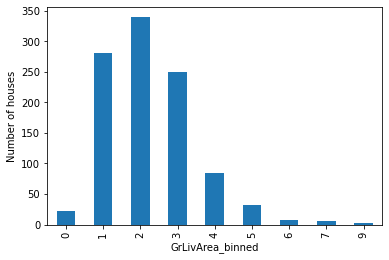

In [22]:
# in the equal width discretisers, each bin does not necessarily contain
# the same number of observations.
tmp.groupby('GrLivArea_binned')['GrLivArea'].count().plot.bar()
plt.ylabel('Number of houses')

### Now return interval boundaries instead

In [23]:
ewd = dsc.EqualWidthDiscretiser(bins=10, variables=['LotArea', 'GrLivArea'], return_boundaries=True)

ewd.fit(X_train)

EqualWidthDiscretiser(bins=10, return_boundaries=True, return_object=False,
                      variables=['LotArea', 'GrLivArea'])

In [24]:
train_t = ewd.transform(X_train)
test_t = ewd.transform(X_test)

In [25]:
# the below are the bins into which the observations were sorted
train_t['GrLivArea'].unique()

[(1636.6, 2070.8], (1202.4, 1636.6], (768.2, 1202.4], (-inf, 768.2], (2070.8, 2505.0], (2939.2, 3373.4], (2505.0, 2939.2], (3373.4, 3807.6], (4241.8, inf]]
Categories (9, interval[float64]): [(-inf, 768.2] < (768.2, 1202.4] < (1202.4, 1636.6] < (1636.6, 2070.8] ... (2505.0, 2939.2] < (2939.2, 3373.4] < (3373.4, 3807.6] < (4241.8, inf]]

## DecisionTreeDiscretiser

In [19]:
treeDisc = dsc.DecisionTreeDiscretiser(cv=3,
                                       scoring='neg_mean_squared_error',
                                       variables=['LotArea', 'GrLivArea'],
                                       regression=True)

# the tree discretisers needs the target for fitting
treeDisc.fit(X_train, y_train)

DecisionTreeDiscretiser(cv=3, param_grid={'max_depth': [1, 2, 3, 4]},
                        random_state=None, regression=True,
                        scoring='neg_mean_squared_error',
                        variables=['LotArea', 'GrLivArea'])

In [20]:
# the binner contains the best decision tree for each variable
treeDisc.binner_dict_

{'LotArea': GridSearchCV(cv=3, error_score=nan,
              estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
              iid='deprecated', n_jobs=None,
              param_grid={'max_depth': [1, 2, 3, 4]}, pre_dispatch='2*n_jobs',
              refit=True, return_train_score=False,


In [21]:
train_t = treeDisc.transform(X_train)
test_t = treeDisc.transform(X_test)

In [22]:
# the below account for the best obtained bins, aka, the tree predictions

train_t['GrLivArea'].unique()

array([246372.77165354, 149540.32663317, 122286.38839286,  88631.59375   ,
       165174.20895522, 198837.68608414, 312260.5       , 509937.5       ])

In [23]:
# the below account for the best obtained bins, aka, the tree predictions

train_t['LotArea'].unique()

array([181711.59622642, 145405.30751708, 213802.86363636, 251997.13333333])

In [24]:
tmp = pd.concat([X_train['GrLivArea'], train_t['GrLivArea']], axis=1)
tmp.columns = ['GrLivArea', 'GrLivArea_binned']
tmp.head()

,GrLivArea,GrLivArea_binned
64,2034,246372.771654
682,1291,149540.326633
960,858,122286.388393
1384,1258,149540.326633
1100,438,88631.593750


Text(0, 0.5, 'Number of houses per bin')

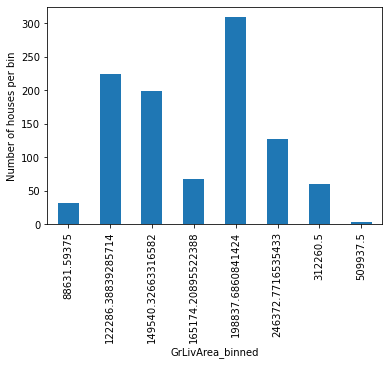

In [25]:
tmp.groupby('GrLivArea_binned')['GrLivArea'].count().plot.bar()
plt.ylabel('Number of houses per bin')

### Decision tree discretiser for classfication

In [26]:
# Load titanic dataset from OpenML

def load_titanic():
    data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')
    data = data.replace('?', np.nan)
    data['cabin'] = data['cabin'].astype(str).str[0]
    data['pclass'] = data['pclass'].astype('O')
    data['embarked'].fillna('C', inplace=True)
    data['fare'] = data['fare'].astype('float').fillna(0)
    data['age'] = data['age'].astype('float').fillna(0)
    return data

In [27]:
# load data
data = load_titanic()
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [28]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['survived', 'name', 'ticket'], axis=1), data['survived'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((916, 11), (393, 11))

In [29]:
X_train[['fare', 'age']].dtypes

fare    float64
age     float64
dtype: object

In [30]:
treeDisc = dsc.DecisionTreeDiscretiser(cv=3,
                                       scoring='roc_auc',
                                       variables=['fare', 'age'],
                                       regression=False)

treeDisc.fit(X_train, y_train)

DecisionTreeDiscretiser(cv=3, param_grid={'max_depth': [1, 2, 3, 4]},
                        random_state=None, regression=False, scoring='roc_auc',
                        variables=['fare', 'age'])

In [31]:
treeDisc.binner_dict_

{'fare': GridSearchCV(cv=3, error_score=nan,
              estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                               criterion='gini', max_depth=None,
                                               max_features=None,
                                               max_leaf_nodes=None,
                                               min_impurity_decrease=0.0,
                                               min_impurity_split=None,
                                               min_samples_leaf=1,
                                               min_samples_split=2,
                                               min_weight_fraction_leaf=0.0,
                                               presort='deprecated',
                                               random_state=None,
                                               splitter='best'),
              iid='deprecated', n_jobs=None,
              param_grid={'max_depth': [1, 2, 3, 4]}, pr

In [32]:
train_t = treeDisc.transform(X_train)
test_t = treeDisc.transform(X_test)

In [33]:
# the below account for the best obtained bins
# in this case, the tree has found that dividing the data in 6 bins is enough
train_t['age'].unique()

array([0.39072848, 0.58974359, 0.26857143, 0.51162791, 0.        ,
       1.        ])

In [34]:
# the below account for the best obtained bins
# in this case, the tree has found that dividing the data in 8 bins is enough
train_t['fare'].unique()

array([0.43333333, 0.24444444, 0.34337349, 0.73684211, 0.75925926,
       0.44444444, 0.33333333, 0.16129032, 0.        , 0.05882353,
       0.88888889, 1.        , 0.70967742, 0.5       ])